In [1]:
import pandas as pd
import numpy as np
import os
import math
import graphlab
import graphlab as gl
import graphlab.aggregate as agg

In [2]:
'''钢炮'''
path = '/home/zongyi/bimbo_data/'

In [4]:
train = gl.SFrame.read_csv(path + 'train_fs_w8.csv', verbose=False)

In [5]:
# town = gl.SFrame.read_csv(path + 'towns.csv', verbose=False)
# train = train.join(town, on=['Agencia_ID','Producto_ID'], how='left')
# train = train.fillna('t_c',1)
# train = train.fillna('tcc',0)
# train = train.fillna('tp_sum',0)
# del train['Town']

In [7]:
# relag_train = gl.SFrame.read_csv(path + 're_lag_train.csv', verbose=False)
# train = train.join(relag_train, on=['Cliente_ID','Producto_ID','Semana'], how='left')
# train = train.fillna('re_lag1',0)
# train = train.fillna('re_lag2',0)
# train = train.fillna('re_lag3',0)
# train = train.fillna('re_lag4',0)
# train = train.fillna('re_lag5',0)
# del relag_train

In [8]:
# pd = gl.SFrame.read_csv(path + 'products.csv', verbose=False)
# train = train.join(pd, on=['Producto_ID'], how='left')
# train = train.fillna('prom',0)
# train = train.fillna('weight',0)
# train = train.fillna('pieces',1)
# train = train.fillna('w_per_piece',0)
# train = train.fillna('healthy',0)
# train = train.fillna('drink',0)
# del train['brand']
# del train['NombreProducto']
# del pd

In [9]:
# client = gl.SFrame.read_csv(path + 'clients.csv', verbose=False)
# train = train.join(client, on=['Cliente_ID'], how='left')
# del client

In [5]:
# del train['prior_sum']
del train['lag_sum']
# del train['week_times']
# del train['Semana']

In [7]:
del train['n_t']

In [8]:
print train.column_names()
print len(train.column_names())

['Agencia_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID', 'Demada_log', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'week_times', 'prior_sum', 'n_a', 'n_r', 'n_c', 'n_p', 'Town', 't_c', 'tcc', 'tp_sum', 're_sum', 'p_clt', 'weight', 'pieces', 'w_per_piece', 'price', 'c_clt']
27


In [9]:
# Make a train-test split
# train_data, test_data = train.random_split(0.999)

# Create a model.
model = gl.boosted_trees_regression.create(train, target='Demada_log',
                                           step_size=0.1,
                                           max_iterations=1000,
                                           max_depth = 10,
                                          metric='rmse',
                                          random_seed=888,
                                          column_subsample=0.5,
                                          row_subsample=0.85,
                                          validation_set=None,
                                          model_checkpoint_path=path,
                                          model_checkpoint_interval=1000)


Boosted trees regression:

--------------------------------------------------------

Number of examples          : 10406868

Number of features          : 26

Number of unpacked features : 26

+-----------+--------------+---------------+

| Iteration | Elapsed Time | Training-rmse |

+-----------+--------------+---------------+

| 1         | 36.213101    | 1.266761      |

| 2         | 69.869146    | 1.160992      |

| 3         | 102.454911   | 1.067435      |

| 4         | 139.018317   | 0.985229      |

| 5         | 171.412345   | 0.913971      |

| 6         | 201.474416   | 0.850190      |

| 7         | 234.082457   | 0.794095      |

| 8         | 266.169192   | 0.744971      |

| 9         | 299.507500   | 0.702752      |

| 10        | 331.253865   | 0.666530      |

| 11        | 361.573010   | 0.635953      |

| 12        | 395.159775   | 0.609914      |

| 13        | 428.551260   | 0.587116      |

| 14        | 460.934803   | 0.568120      |

| 15        | 491.865001   | 0.551646      |

| 16        | 524.948454   | 0.537632      |

| 17        | 558.275770   | 0.526377      |

| 18        | 589.109454   | 0.516004      |

| 19        | 621.042667   | 0.507701      |

| 20        | 651.297185   | 0.500700      |

| 21        | 686.513820   | 0.494635      |

| 22        | 717.932897   | 0.489542      |

| 23        | 751.590143   | 0.485160      |

| 24        | 783.644996   | 0.481709      |

| 25        | 816.987080   | 0.478679      |

| 26        | 848.357660   | 0.476156      |

| 27        | 880.878577   | 0.473814      |

| 28        | 912.246532   | 0.472053      |

| 29        | 944.557304   | 0.470091      |

| 30        | 978.949439   | 0.468609      |

| 31        | 1010.588069  | 0.467265      |

| 32        | 1043.340364  | 0.465842      |

| 33        | 1074.981766  | 0.464913      |

| 34        | 1106.489368  | 0.464006      |

| 35        | 1141.883192  | 0.463165      |

| 36        | 1174.796601  | 0.462330      |

| 37        | 1207.209942  | 0.461697      |

| 38        | 1239.021429  | 0.461109      |

| 39        | 1273.250798  | 0.460501      |

| 40        | 1306.163476  | 0.460006      |

| 41        | 1338.867829  | 0.459565      |

| 42        | 1371.824114  | 0.459100      |

| 43        | 1404.081056  | 0.458676      |

| 44        | 1438.708553  | 0.458291      |

| 45        | 1473.487966  | 0.457885      |

| 46        | 1506.607967  | 0.457609      |

| 47        | 1540.317590  | 0.457212      |

| 48        | 1574.511117  | 0.456943      |

| 49        | 1607.607612  | 0.456615      |

| 50        | 1640.793749  | 0.456305      |

| 51        | 1675.861757  | 0.455958      |

| 52        | 1708.957376  | 0.455663      |

| 53        | 1744.114581  | 0.455267      |

| 54        | 1775.232796  | 0.455071      |

| 55        | 1810.639830  | 0.454729      |

| 56        | 1843.890298  | 0.454433      |

| 57        | 1879.255757  | 0.454179      |

| 58        | 1909.012870  | 0.454037      |

| 59        | 1943.134295  | 0.453839      |

| 60        | 1977.780701  | 0.453675      |

| 61        | 2008.837664  | 0.453476      |

| 62        | 2042.103756  | 0.453258      |

| 63        | 2076.142079  | 0.453068      |

| 64        | 2109.903135  | 0.452910      |

| 65        | 2144.195186  | 0.452714      |

| 66        | 2179.085723  | 0.452558      |

| 67        | 2213.313941  | 0.452401      |

| 68        | 2246.535962  | 0.452216      |

| 69        | 2279.753345  | 0.452037      |

| 70        | 2311.884542  | 0.451881      |

| 71        | 2344.735998  | 0.451737      |

| 72        | 2378.750824  | 0.451582      |

| 73        | 2413.237267  | 0.451426      |

| 74        | 2444.542676  | 0.451288      |

| 75        | 2478.430018  | 0.451154      |

| 76        | 2511.815951  | 0.451034      |

| 77        | 2545.653780  | 0.450917      |

| 78        | 2580.405128  | 0.450712      |

| 79        | 2611.969493  | 0.450569      |

| 80        | 2645.097519  | 0.450470      |

| 81        | 2682.155846  | 0.450279      |

| 82        | 2714.956785  | 0.450184      |

| 83        | 2746.261091  | 0.450022      |

| 84        | 2778.048473  | 0.449912      |

| 85        | 2811.065730  | 0.449777      |

| 86        | 2842.662669  | 0.449633      |

| 87        | 2874.547814  | 0.449543      |

| 88        | 2909.998280  | 0.449396      |

| 89        | 2941.666856  | 0.449289      |

| 90        | 2976.456026  | 0.449197      |

| 91        | 3009.154018  | 0.449072      |

| 92        | 3043.123803  | 0.448938      |

| 93        | 3077.016713  | 0.448819      |

| 94        | 3112.608115  | 0.448703      |

| 95        | 3144.100182  | 0.448619      |

| 96        | 3175.864919  | 0.448537      |

| 97        | 3210.943981  | 0.448417      |

| 98        | 3242.748720  | 0.448298      |

| 99        | 3275.888662  | 0.448205      |

| 100       | 3308.760911  | 0.448098      |

| 101       | 3340.688130  | 0.447993      |

| 102       | 3375.117380  | 0.447880      |

| 103       | 3409.213783  | 0.447731      |

| 104       | 3444.891978  | 0.447635      |

| 105       | 3477.067828  | 0.447561      |

| 106       | 3511.263294  | 0.447483      |

| 107       | 3544.792207  | 0.447404      |

| 108       | 3576.860928  | 0.447300      |

| 109       | 3610.831005  | 0.447191      |

| 110       | 3644.685669  | 0.447085      |

| 111       | 3677.940007  | 0.446991      |

| 112       | 3713.537763  | 0.446900      |

| 113       | 3746.976268  | 0.446799      |

| 114       | 3779.388458  | 0.446722      |

| 115       | 3813.673116  | 0.446634      |

| 116       | 3847.601651  | 0.446558      |

| 117       | 3881.404975  | 0.446476      |

| 118       | 3914.629634  | 0.446373      |

| 119       | 3948.375151  | 0.446306      |

| 120       | 3980.854699  | 0.446233      |

| 121       | 4012.208786  | 0.446157      |

| 122       | 4043.972636  | 0.446082      |

| 123       | 4075.965851  | 0.445998      |

| 124       | 4111.250689  | 0.445914      |

| 125       | 4144.092828  | 0.445851      |

| 126       | 4178.548192  | 0.445758      |

| 127       | 4211.132180  | 0.445692      |

| 128       | 4242.479970  | 0.445646      |

| 129       | 4276.522324  | 0.445571      |

| 130       | 4309.927652  | 0.445493      |

| 131       | 4341.770431  | 0.445433      |

| 132       | 4374.462735  | 0.445370      |

| 133       | 4408.076236  | 0.445295      |

| 134       | 4438.438586  | 0.445229      |

| 135       | 4471.828174  | 0.445158      |

| 136       | 4501.454436  | 0.445105      |

| 137       | 4533.237854  | 0.445041      |

| 138       | 4567.272290  | 0.444965      |

| 139       | 4600.120207  | 0.444909      |

| 140       | 4632.992856  | 0.444851      |

| 141       | 4666.532499  | 0.444795      |

| 142       | 4700.341222  | 0.444710      |

| 143       | 4731.729853  | 0.444648      |

| 144       | 4762.396472  | 0.444583      |

| 145       | 4793.984415  | 0.444530      |

| 146       | 4827.526529  | 0.444469      |

| 147       | 4861.197602  | 0.444417      |

| 148       | 4892.877895  | 0.444367      |

| 149       | 4925.009958  | 0.444325      |

| 150       | 4958.302055  | 0.444266      |

| 151       | 4991.444361  | 0.444189      |

| 152       | 5023.972298  | 0.444135      |

| 153       | 5056.360258  | 0.444060      |

| 154       | 5090.985811  | 0.443985      |

| 155       | 5122.482650  | 0.443920      |

| 156       | 5157.117244  | 0.443866      |

| 157       | 5189.759320  | 0.443834      |

| 158       | 5222.802752  | 0.443794      |

| 159       | 5256.067271  | 0.443736      |

| 160       | 5287.483342  | 0.443697      |

| 161       | 5321.008130  | 0.443651      |

| 162       | 5353.732932  | 0.443596      |

| 163       | 5389.635278  | 0.443542      |

| 164       | 5421.943748  | 0.443501      |

| 165       | 5457.399461  | 0.443462      |

| 166       | 5492.413030  | 0.443420      |

| 167       | 5525.862305  | 0.443371      |

| 168       | 5557.509745  | 0.443327      |

| 169       | 5590.382071  | 0.443273      |

| 170       | 5626.279431  | 0.443205      |

| 171       | 5659.331748  | 0.443138      |

| 172       | 5695.301261  | 0.443072      |

| 173       | 5728.556172  | 0.443027      |

| 174       | 5764.223809  | 0.442947      |

| 175       | 5797.844936  | 0.442896      |

| 176       | 5830.374527  | 0.442854      |

| 177       | 5864.461054  | 0.442803      |

| 178       | 5898.740296  | 0.442732      |

| 179       | 5931.193365  | 0.442684      |

| 180       | 5968.549060  | 0.442645      |

| 181       | 5999.547662  | 0.442616      |

| 182       | 6034.388211  | 0.442541      |

| 183       | 6065.144930  | 0.442489      |

| 184       | 6098.922150  | 0.442447      |

| 185       | 6130.449972  | 0.442421      |

| 186       | 6163.895870  | 0.442363      |

| 187       | 6197.470419  | 0.442297      |

| 188       | 6230.321891  | 0.442242      |

| 189       | 6262.851230  | 0.442191      |

| 190       | 6296.203773  | 0.442157      |

| 191       | 6327.167481  | 0.442123      |

| 192       | 6361.087853  | 0.442068      |

| 193       | 6393.586051  | 0.442016      |

| 194       | 6426.704416  | 0.441952      |

| 195       | 6460.095715  | 0.441902      |

| 196       | 6490.846092  | 0.441864      |

| 197       | 6524.216031  | 0.441807      |

| 198       | 6556.598509  | 0.441763      |

| 199       | 6590.579865  | 0.441734      |

| 200       | 6623.665626  | 0.441698      |

| 201       | 6657.728140  | 0.441644      |

| 202       | 6690.278586  | 0.441617      |

| 203       | 6722.466015  | 0.441575      |

| 204       | 6754.656938  | 0.441542      |

| 205       | 6787.170398  | 0.441502      |

| 206       | 6818.106165  | 0.441476      |

| 207       | 6850.992234  | 0.441438      |

| 208       | 6884.663985  | 0.441388      |

| 209       | 6919.292128  | 0.441346      |

| 210       | 6951.890382  | 0.441307      |

| 211       | 6985.469886  | 0.441268      |

| 212       | 7020.340208  | 0.441211      |

| 213       | 7050.974967  | 0.441184      |

| 214       | 7084.711565  | 0.441131      |

| 215       | 7116.553014  | 0.441098      |

| 216       | 7151.020874  | 0.441065      |

| 217       | 7181.750469  | 0.441040      |

| 218       | 7217.869296  | 0.440990      |

| 219       | 7251.825275  | 0.440951      |

| 220       | 7286.632962  | 0.440920      |

| 221       | 7317.343030  | 0.440887      |

| 222       | 7348.691469  | 0.440846      |

| 223       | 7381.560095  | 0.440819      |

| 224       | 7414.329929  | 0.440784      |

| 225       | 7447.447909  | 0.440748      |

| 226       | 7478.683230  | 0.440741      |

| 227       | 7512.632122  | 0.440719      |

| 228       | 7545.112434  | 0.440676      |

| 229       | 7578.946483  | 0.440643      |

| 230       | 7610.097225  | 0.440616      |

| 231       | 7642.093244  | 0.440569      |

| 232       | 7673.698210  | 0.440531      |

| 233       | 7707.339214  | 0.440501      |

| 234       | 7742.291933  | 0.440470      |

| 235       | 7775.875082  | 0.440443      |

| 236       | 7808.332308  | 0.440392      |

| 237       | 7841.817749  | 0.440378      |

| 238       | 7874.355395  | 0.440327      |

| 239       | 7908.428384  | 0.440306      |

| 240       | 7940.414681  | 0.440283      |

| 241       | 7974.370841  | 0.440243      |

| 242       | 8005.321279  | 0.440217      |

| 243       | 8035.987327  | 0.440175      |

| 244       | 8070.643908  | 0.440145      |

| 245       | 8104.864807  | 0.440098      |

| 246       | 8138.421183  | 0.440052      |

| 247       | 8171.691412  | 0.440016      |

| 248       | 8206.636703  | 0.439977      |

| 249       | 8239.277076  | 0.439955      |

| 250       | 8271.465755  | 0.439913      |

| 251       | 8302.904582  | 0.439858      |

| 252       | 8334.417855  | 0.439821      |

| 253       | 8368.873847  | 0.439770      |

| 254       | 8403.174456  | 0.439734      |

| 255       | 8438.169963  | 0.439705      |

| 256       | 8471.804633  | 0.439673      |

| 257       | 8503.206791  | 0.439642      |

| 258       | 8536.323271  | 0.439613      |

| 259       | 8569.792801  | 0.439581      |

| 260       | 8603.086044  | 0.439549      |

| 261       | 8635.803934  | 0.439520      |

| 262       | 8668.953112  | 0.439472      |

| 263       | 8701.892296  | 0.439436      |

| 264       | 8734.437064  | 0.439397      |

| 265       | 8767.651508  | 0.439378      |

| 266       | 8799.738793  | 0.439334      |

| 267       | 8833.200127  | 0.439302      |

| 268       | 8868.518436  | 0.439260      |

| 269       | 8900.413953  | 0.439209      |

| 270       | 8932.318615  | 0.439181      |

| 271       | 8965.811984  | 0.439152      |

| 272       | 8998.758336  | 0.439111      |

| 273       | 9029.100134  | 0.439081      |

| 274       | 9060.044630  | 0.439055      |

| 275       | 9090.826852  | 0.439030      |

| 276       | 9123.452962  | 0.438974      |

| 277       | 9156.517571  | 0.438964      |

| 278       | 9190.295381  | 0.438937      |

| 279       | 9224.635343  | 0.438897      |

| 280       | 9259.605566  | 0.438852      |

| 281       | 9292.368352  | 0.438818      |

| 282       | 9323.700774  | 0.438800      |

| 283       | 9356.252274  | 0.438779      |

| 284       | 9389.388704  | 0.438755      |

| 285       | 9421.816661  | 0.438732      |

| 286       | 9456.012662  | 0.438696      |

| 287       | 9488.934584  | 0.438673      |

| 288       | 9521.383441  | 0.438653      |

| 289       | 9552.243108  | 0.438604      |

| 290       | 9586.061248  | 0.438554      |

| 291       | 9619.801340  | 0.438527      |

| 292       | 9653.726176  | 0.438481      |

| 293       | 9686.861104  | 0.438453      |

| 294       | 9717.744653  | 0.438421      |

| 295       | 9749.096022  | 0.438403      |

| 296       | 9782.694843  | 0.438384      |

| 297       | 9816.285392  | 0.438356      |

| 298       | 9849.557130  | 0.438334      |

| 299       | 9880.155827  | 0.438330      |

| 300       | 9911.945655  | 0.438302      |

| 301       | 9942.031499  | 0.438286      |

| 302       | 9974.345965  | 0.438257      |

| 303       | 10006.099329 | 0.438243      |

| 304       | 10038.123642 | 0.438227      |

| 305       | 10069.407666 | 0.438195      |

| 306       | 10102.816878 | 0.438161      |

| 307       | 10132.433754 | 0.438144      |

| 308       | 10165.197256 | 0.438129      |

| 309       | 10196.348759 | 0.438108      |

| 310       | 10228.424173 | 0.438072      |

| 311       | 10262.127447 | 0.438051      |

| 312       | 10293.774296 | 0.438031      |

| 313       | 10329.439082 | 0.438007      |

| 314       | 10361.062952 | 0.437988      |

| 315       | 10393.447973 | 0.437969      |

| 316       | 10427.375324 | 0.437949      |

| 317       | 10459.159870 | 0.437916      |

| 318       | 10495.168483 | 0.437882      |

| 319       | 10527.576017 | 0.437851      |

| 320       | 10562.495202 | 0.437819      |

| 321       | 10596.562299 | 0.437804      |

| 322       | 10630.425153 | 0.437778      |

| 323       | 10663.851405 | 0.437756      |

| 324       | 10694.703234 | 0.437722      |

| 325       | 10727.244124 | 0.437674      |

| 326       | 10761.024681 | 0.437632      |

| 327       | 10793.249607 | 0.437617      |

| 328       | 10827.726622 | 0.437587      |

| 329       | 10860.830003 | 0.437567      |

| 330       | 10894.916394 | 0.437546      |

| 331       | 10927.237904 | 0.437513      |

| 332       | 10962.900582 | 0.437460      |

| 333       | 10998.020088 | 0.437445      |

| 334       | 11031.408898 | 0.437434      |

| 335       | 11062.297333 | 0.437399      |

| 336       | 11097.811357 | 0.437372      |

| 337       | 11131.346975 | 0.437328      |

| 338       | 11162.420027 | 0.437302      |

| 339       | 11194.073378 | 0.437275      |

| 340       | 11225.963540 | 0.437251      |

| 341       | 11260.633391 | 0.437237      |

| 342       | 11294.565145 | 0.437221      |

| 343       | 11324.652970 | 0.437204      |

| 344       | 11358.694491 | 0.437179      |

| 345       | 11389.579379 | 0.437165      |

| 346       | 11421.252917 | 0.437149      |

| 347       | 11452.774171 | 0.437125      |

| 348       | 11485.659130 | 0.437107      |

| 349       | 11517.154514 | 0.437091      |

| 350       | 11549.969106 | 0.437072      |

| 351       | 11584.637739 | 0.437035      |

| 352       | 11620.402283 | 0.436997      |

| 353       | 11653.124271 | 0.436971      |

| 354       | 11685.733043 | 0.436925      |

| 355       | 11719.159007 | 0.436905      |

| 356       | 11752.329140 | 0.436859      |

| 357       | 11786.295886 | 0.436845      |

| 358       | 11817.563653 | 0.436832      |

| 359       | 11849.770542 | 0.436810      |

| 360       | 11884.341091 | 0.436798      |

| 361       | 11914.946777 | 0.436780      |

| 362       | 11948.377333 | 0.436750      |

| 363       | 11979.525635 | 0.436735      |

| 364       | 12012.380681 | 0.436721      |

| 365       | 12043.020551 | 0.436695      |

| 366       | 12074.117200 | 0.436680      |

| 367       | 12108.722058 | 0.436657      |

| 368       | 12141.783444 | 0.436627      |

| 369       | 12176.265775 | 0.436606      |

| 370       | 12210.260225 | 0.436583      |

| 371       | 12244.004913 | 0.436569      |

| 372       | 12278.153829 | 0.436543      |

| 373       | 12311.364937 | 0.436524      |

| 374       | 12345.807425 | 0.436490      |

| 375       | 12376.892699 | 0.436458      |

| 376       | 12411.198387 | 0.436424      |

| 377       | 12444.028187 | 0.436381      |

| 378       | 12475.538418 | 0.436359      |

| 379       | 12508.952183 | 0.436326      |

| 380       | 12542.731216 | 0.436290      |

| 381       | 12578.409407 | 0.436254      |

| 382       | 12611.997536 | 0.436223      |

| 383       | 12644.436085 | 0.436199      |

| 384       | 12677.194233 | 0.436171      |

| 385       | 12709.497535 | 0.436153      |

| 386       | 12740.730699 | 0.436136      |

| 387       | 12773.119094 | 0.436111      |

| 388       | 12803.193923 | 0.436092      |

| 389       | 12836.610243 | 0.436060      |

| 390       | 12870.885645 | 0.436040      |

| 391       | 12904.065225 | 0.436009      |

| 392       | 12936.722791 | 0.435989      |

| 393       | 12972.016123 | 0.435964      |

| 394       | 13006.819562 | 0.435932      |

| 395       | 13040.561308 | 0.435910      |

| 396       | 13072.924363 | 0.435884      |

| 397       | 13106.627144 | 0.435861      |

| 398       | 13137.759933 | 0.435836      |

| 399       | 13169.259505 | 0.435806      |

| 400       | 13201.700337 | 0.435787      |

| 401       | 13235.936067 | 0.435774      |

| 402       | 13271.090261 | 0.435749      |

| 403       | 13304.565070 | 0.435725      |

| 404       | 13339.648011 | 0.435699      |

| 405       | 13371.746946 | 0.435675      |

| 406       | 13402.722014 | 0.435668      |

| 407       | 13435.160771 | 0.435650      |

| 408       | 13466.343597 | 0.435639      |

| 409       | 13498.845075 | 0.435616      |

| 410       | 13532.161321 | 0.435589      |

| 411       | 13563.949340 | 0.435544      |

| 412       | 13599.097765 | 0.435516      |

| 413       | 13631.034574 | 0.435499      |

| 414       | 13661.146792 | 0.435474      |

| 415       | 13694.777680 | 0.435448      |

| 416       | 13726.867209 | 0.435429      |

| 417       | 13759.837905 | 0.435381      |

| 418       | 13792.816387 | 0.435359      |

| 419       | 13824.598569 | 0.435345      |

| 420       | 13857.169494 | 0.435332      |

| 421       | 13890.012461 | 0.435294      |

| 422       | 13923.395250 | 0.435275      |

| 423       | 13957.198397 | 0.435240      |

| 424       | 13990.696245 | 0.435217      |

| 425       | 14020.303028 | 0.435205      |

| 426       | 14056.072573 | 0.435167      |

| 427       | 14086.800999 | 0.435156      |

| 428       | 14119.722817 | 0.435107      |

| 429       | 14152.162367 | 0.435094      |

| 430       | 14185.610757 | 0.435074      |

| 431       | 14216.924099 | 0.435057      |

| 432       | 14246.631647 | 0.435033      |

| 433       | 14280.977895 | 0.435005      |

| 434       | 14314.250863 | 0.434978      |

| 435       | 14347.023655 | 0.434955      |

| 436       | 14378.622908 | 0.434925      |

| 437       | 14411.433163 | 0.434898      |

| 438       | 14444.132931 | 0.434866      |

| 439       | 14475.973968 | 0.434847      |

| 440       | 14507.502459 | 0.434831      |

| 441       | 14541.313901 | 0.434807      |

| 442       | 14573.082334 | 0.434785      |

| 443       | 14605.613730 | 0.434757      |

| 444       | 14638.200366 | 0.434736      |

| 445       | 14672.720773 | 0.434715      |

| 446       | 14707.039947 | 0.434670      |

| 447       | 14736.854262 | 0.434667      |

| 448       | 14769.924317 | 0.434645      |

| 449       | 14800.393661 | 0.434630      |

| 450       | 14834.293729 | 0.434599      |

| 451       | 14866.798080 | 0.434585      |

| 452       | 14897.010681 | 0.434566      |

| 453       | 14930.630461 | 0.434546      |

| 454       | 14963.095337 | 0.434503      |

| 455       | 14995.378019 | 0.434490      |

| 456       | 15029.915402 | 0.434462      |

| 457       | 15061.865975 | 0.434440      |

| 458       | 15093.278202 | 0.434430      |

| 459       | 15125.598439 | 0.434419      |

| 460       | 15161.290808 | 0.434373      |

| 461       | 15193.485465 | 0.434353      |

| 462       | 15225.769827 | 0.434335      |

| 463       | 15261.759701 | 0.434310      |

| 464       | 15294.299816 | 0.434301      |

| 465       | 15326.828509 | 0.434271      |

| 466       | 15360.528702 | 0.434232      |

| 467       | 15391.074857 | 0.434218      |

| 468       | 15424.984956 | 0.434202      |

| 469       | 15460.043372 | 0.434181      |

| 470       | 15493.082207 | 0.434165      |

| 471       | 15525.337806 | 0.434135      |

| 472       | 15559.795805 | 0.434101      |

| 473       | 15591.281691 | 0.434078      |

| 474       | 15624.495819 | 0.434048      |

| 475       | 15656.896715 | 0.434021      |

| 476       | 15687.232494 | 0.434001      |

| 477       | 15720.211503 | 0.433993      |

| 478       | 15753.254197 | 0.433969      |

| 479       | 15786.861395 | 0.433956      |

| 480       | 15818.917130 | 0.433923      |

| 481       | 15852.381558 | 0.433907      |

| 482       | 15888.114941 | 0.433881      |

| 483       | 15921.479869 | 0.433860      |

| 484       | 15955.529582 | 0.433821      |

| 485       | 15988.666928 | 0.433802      |

| 486       | 16022.210064 | 0.433776      |

| 487       | 16055.108076 | 0.433756      |

| 488       | 16089.077989 | 0.433737      |

| 489       | 16121.535542 | 0.433719      |

| 490       | 16151.264951 | 0.433709      |

| 491       | 16186.934756 | 0.433686      |

| 492       | 16220.871042 | 0.433669      |

| 493       | 16254.915214 | 0.433629      |

| 494       | 16286.725195 | 0.433604      |

| 495       | 16320.745292 | 0.433593      |

| 496       | 16354.420158 | 0.433562      |

| 497       | 16386.643881 | 0.433542      |

| 498       | 16416.952491 | 0.433536      |

| 499       | 16449.677819 | 0.433496      |

| 500       | 16484.355001 | 0.433471      |

| 501       | 16516.588471 | 0.433448      |

| 502       | 16549.553371 | 0.433431      |

| 503       | 16585.175389 | 0.433411      |

| 504       | 16617.873105 | 0.433395      |

| 505       | 16651.315560 | 0.433373      |

| 506       | 16685.140180 | 0.433336      |

| 507       | 16714.590470 | 0.433330      |

| 508       | 16748.298238 | 0.433313      |

| 509       | 16780.857912 | 0.433291      |

| 510       | 16814.458496 | 0.433274      |

| 511       | 16846.208776 | 0.433264      |

| 512       | 16879.703434 | 0.433243      |

| 513       | 16909.780621 | 0.433225      |

| 514       | 16939.811218 | 0.433216      |

| 515       | 16972.932428 | 0.433192      |

| 516       | 17006.255959 | 0.433171      |

| 517       | 17039.641554 | 0.433139      |

| 518       | 17074.592353 | 0.433109      |

| 519       | 17109.042898 | 0.433076      |

| 520       | 17141.323239 | 0.433060      |

| 521       | 17171.833170 | 0.433054      |

| 522       | 17206.960241 | 0.433039      |

| 523       | 17239.786014 | 0.433009      |

| 524       | 17269.915106 | 0.432996      |

| 525       | 17301.670933 | 0.432979      |

| 526       | 17335.710995 | 0.432944      |

| 527       | 17370.794926 | 0.432915      |

| 528       | 17401.872069 | 0.432899      |

| 529       | 17434.497881 | 0.432877      |

| 530       | 17468.654681 | 0.432859      |

| 531       | 17502.675783 | 0.432834      |

| 532       | 17536.511337 | 0.432815      |

| 533       | 17570.121590 | 0.432793      |

| 534       | 17603.770411 | 0.432777      |

| 535       | 17635.341175 | 0.432758      |

| 536       | 17666.301911 | 0.432751      |

| 537       | 17700.491708 | 0.432734      |

| 538       | 17732.113670 | 0.432705      |

| 539       | 17762.503967 | 0.432681      |

| 540       | 17795.473571 | 0.432644      |

| 541       | 17828.919603 | 0.432611      |

| 542       | 17861.564459 | 0.432592      |

| 543       | 17893.569359 | 0.432581      |

| 544       | 17927.108814 | 0.432555      |

| 545       | 17958.442862 | 0.432544      |

| 546       | 17990.959632 | 0.432537      |

| 547       | 18023.338579 | 0.432530      |

| 548       | 18054.707514 | 0.432503      |

| 549       | 18085.342867 | 0.432492      |

| 550       | 18117.880746 | 0.432455      |

| 551       | 18150.204321 | 0.432443      |

| 552       | 18183.032442 | 0.432416      |

| 553       | 18217.054362 | 0.432388      |

| 554       | 18252.061168 | 0.432375      |

| 555       | 18285.018149 | 0.432356      |

| 556       | 18320.205734 | 0.432333      |

| 557       | 18352.064596 | 0.432321      |

| 558       | 18385.463247 | 0.432299      |

| 559       | 18418.736829 | 0.432276      |

| 560       | 18450.791685 | 0.432265      |

| 561       | 18484.288218 | 0.432240      |

| 562       | 18515.775591 | 0.432221      |

| 563       | 18548.539367 | 0.432206      |

| 564       | 18580.401891 | 0.432194      |

| 565       | 18613.576314 | 0.432179      |

| 566       | 18648.094831 | 0.432165      |

| 567       | 18679.447982 | 0.432148      |

| 568       | 18711.974305 | 0.432132      |

| 569       | 18746.430851 | 0.432109      |

| 570       | 18777.477616 | 0.432083      |

| 571       | 18808.742500 | 0.432071      |

| 572       | 18842.928120 | 0.432051      |

| 573       | 18877.014147 | 0.432018      |

| 574       | 18910.167356 | 0.431998      |

| 575       | 18941.861008 | 0.431978      |

| 576       | 18974.935764 | 0.431954      |

| 577       | 19009.663355 | 0.431930      |

| 578       | 19043.586820 | 0.431897      |

| 579       | 19075.795138 | 0.431889      |

| 580       | 19108.302778 | 0.431860      |

| 581       | 19142.450166 | 0.431816      |

| 582       | 19175.164227 | 0.431808      |

| 583       | 19207.751201 | 0.431790      |

| 584       | 19239.028738 | 0.431771      |

| 585       | 19270.965354 | 0.431762      |

| 586       | 19302.830026 | 0.431734      |

| 587       | 19336.070656 | 0.431719      |

| 588       | 19369.763773 | 0.431697      |

| 589       | 19402.364577 | 0.431686      |

| 590       | 19435.420554 | 0.431667      |

| 591       | 19467.357974 | 0.431648      |

| 592       | 19501.097209 | 0.431610      |

| 593       | 19533.572536 | 0.431601      |

| 594       | 19564.908026 | 0.431590      |

| 595       | 19598.285219 | 0.431573      |

| 596       | 19630.405475 | 0.431564      |

| 597       | 19662.241383 | 0.431535      |

| 598       | 19695.753901 | 0.431520      |

| 599       | 19727.643651 | 0.431507      |

| 600       | 19760.437548 | 0.431487      |

| 601       | 19792.783890 | 0.431476      |

| 602       | 19825.047513 | 0.431463      |

| 603       | 19858.857143 | 0.431447      |

| 604       | 19891.333444 | 0.431422      |

| 605       | 19926.235547 | 0.431407      |

| 606       | 19959.056863 | 0.431379      |

| 607       | 19991.547461 | 0.431370      |

| 608       | 20025.497578 | 0.431349      |

| 609       | 20056.747205 | 0.431323      |

| 610       | 20089.830211 | 0.431290      |

| 611       | 20125.033451 | 0.431261      |

| 612       | 20157.701445 | 0.431229      |

| 613       | 20192.102885 | 0.431225      |

| 614       | 20223.825646 | 0.431209      |

| 615       | 20254.308364 | 0.431199      |

| 616       | 20289.106188 | 0.431180      |

| 617       | 20322.474082 | 0.431167      |

| 618       | 20355.009622 | 0.431151      |

| 619       | 20390.778972 | 0.431124      |

| 620       | 20426.903508 | 0.431108      |

| 621       | 20458.864737 | 0.431064      |

| 622       | 20492.785491 | 0.431046      |

| 623       | 20524.852506 | 0.431036      |

| 624       | 20558.522615 | 0.431028      |

| 625       | 20587.687210 | 0.431024      |

| 626       | 20621.143638 | 0.431005      |

| 627       | 20651.166307 | 0.430982      |

| 628       | 20684.437259 | 0.430958      |

| 629       | 20718.758041 | 0.430941      |

| 630       | 20753.222906 | 0.430921      |

| 631       | 20785.746637 | 0.430903      |

| 632       | 20818.420372 | 0.430865      |

| 633       | 20850.883989 | 0.430862      |

| 634       | 20884.264358 | 0.430841      |

| 635       | 20915.408110 | 0.430817      |

| 636       | 20949.558987 | 0.430805      |

| 637       | 20982.051821 | 0.430785      |

| 638       | 21014.381924 | 0.430768      |

| 639       | 21048.418912 | 0.430746      |

| 640       | 21081.604151 | 0.430730      |

| 641       | 21112.674470 | 0.430713      |

| 642       | 21145.414509 | 0.430695      |

| 643       | 21178.118267 | 0.430681      |

| 644       | 21210.260708 | 0.430658      |

| 645       | 21240.516634 | 0.430644      |

| 646       | 21274.390864 | 0.430631      |

| 647       | 21307.411570 | 0.430614      |

| 648       | 21339.449181 | 0.430603      |

| 649       | 21371.432687 | 0.430580      |

| 650       | 21404.580554 | 0.430565      |

| 651       | 21438.622525 | 0.430540      |

| 652       | 21469.959652 | 0.430525      |

| 653       | 21502.842333 | 0.430511      |

| 654       | 21536.503162 | 0.430491      |

| 655       | 21569.489493 | 0.430474      |

| 656       | 21601.945700 | 0.430454      |

| 657       | 21634.504443 | 0.430440      |

| 658       | 21667.248629 | 0.430434      |

| 659       | 21700.741975 | 0.430424      |

| 660       | 21735.252621 | 0.430402      |

| 661       | 21767.605567 | 0.430395      |

| 662       | 21801.502819 | 0.430391      |

| 663       | 21836.040748 | 0.430374      |

| 664       | 21867.648658 | 0.430369      |

| 665       | 21900.156564 | 0.430353      |

| 666       | 21931.444706 | 0.430338      |

| 667       | 21965.421339 | 0.430325      |

| 668       | 21997.123986 | 0.430312      |

| 669       | 22031.103869 | 0.430283      |

| 670       | 22064.707932 | 0.430271      |

| 671       | 22098.663410 | 0.430236      |

| 672       | 22130.140454 | 0.430225      |

| 673       | 22163.676449 | 0.430205      |

| 674       | 22197.467074 | 0.430167      |

| 675       | 22232.760109 | 0.430133      |

| 676       | 22264.556144 | 0.430125      |

| 677       | 22296.130651 | 0.430102      |

| 678       | 22329.568750 | 0.430074      |

| 679       | 22363.427272 | 0.430060      |

| 680       | 22395.462576 | 0.430048      |

| 681       | 22428.847626 | 0.430033      |

| 682       | 22459.145839 | 0.430013      |

| 683       | 22490.985096 | 0.429987      |

| 684       | 22524.535817 | 0.429963      |

| 685       | 22555.681849 | 0.429944      |

| 686       | 22586.546600 | 0.429933      |

| 687       | 22617.009874 | 0.429916      |

| 688       | 22652.028748 | 0.429904      |

| 689       | 22683.433374 | 0.429891      |

| 690       | 22717.431180 | 0.429878      |

| 691       | 22749.846605 | 0.429869      |

| 692       | 22780.713604 | 0.429859      |

| 693       | 22813.378098 | 0.429849      |

| 694       | 22844.452149 | 0.429836      |

| 695       | 22877.665316 | 0.429817      |

| 696       | 22911.403714 | 0.429798      |

| 697       | 22945.163345 | 0.429766      |

| 698       | 22975.876356 | 0.429753      |

| 699       | 23007.578386 | 0.429732      |

| 700       | 23040.563508 | 0.429718      |

| 701       | 23073.387738 | 0.429699      |

| 702       | 23106.681872 | 0.429685      |

| 703       | 23141.054201 | 0.429674      |

| 704       | 23175.448958 | 0.429653      |

| 705       | 23208.059677 | 0.429633      |

| 706       | 23242.498708 | 0.429613      |

| 707       | 23275.986782 | 0.429595      |

| 708       | 23311.966882 | 0.429555      |

| 709       | 23344.499080 | 0.429545      |

| 710       | 23377.724348 | 0.429520      |

| 711       | 23412.433750 | 0.429475      |

| 712       | 23443.331745 | 0.429468      |

| 713       | 23477.019763 | 0.429441      |

| 714       | 23510.421350 | 0.429427      |

| 715       | 23541.808955 | 0.429418      |

| 716       | 23574.796768 | 0.429384      |

| 717       | 23607.264823 | 0.429370      |

| 718       | 23641.130848 | 0.429351      |

| 719       | 23674.283914 | 0.429329      |

| 720       | 23706.646982 | 0.429310      |

| 721       | 23739.118276 | 0.429304      |

| 722       | 23771.560051 | 0.429279      |

| 723       | 23803.996312 | 0.429260      |

| 724       | 23836.203752 | 0.429243      |

| 725       | 23868.047963 | 0.429221      |

| 726       | 23901.263965 | 0.429203      |

| 727       | 23933.563588 | 0.429184      |

| 728       | 23966.999899 | 0.429157      |

| 729       | 23997.799106 | 0.429146      |

| 730       | 24029.106575 | 0.429129      |

| 731       | 24060.073943 | 0.429096      |

| 732       | 24090.621347 | 0.429086      |

| 733       | 24123.115807 | 0.429065      |

| 734       | 24156.390886 | 0.429052      |

| 735       | 24187.582595 | 0.429036      |

| 736       | 24219.402108 | 0.429016      |

| 737       | 24250.808273 | 0.429001      |

| 738       | 24285.413930 | 0.428978      |

| 739       | 24316.951164 | 0.428947      |

| 740       | 24350.545640 | 0.428920      |

| 741       | 24382.457203 | 0.428907      |

| 742       | 24414.319163 | 0.428890      |

| 743       | 24446.353818 | 0.428867      |

| 744       | 24479.621086 | 0.428838      |

| 745       | 24511.738268 | 0.428816      |

| 746       | 24543.244999 | 0.428805      |

| 747       | 24575.807787 | 0.428771      |

| 748       | 24607.041354 | 0.428765      |

| 749       | 24640.551701 | 0.428755      |

| 750       | 24671.923682 | 0.428734      |

| 751       | 24704.782317 | 0.428699      |

| 752       | 24738.660314 | 0.428671      |

| 753       | 24773.291122 | 0.428661      |

| 754       | 24807.863506 | 0.428656      |

| 755       | 24839.651690 | 0.428643      |

| 756       | 24874.250594 | 0.428615      |

| 757       | 24907.332857 | 0.428593      |

| 758       | 24938.206386 | 0.428581      |

| 759       | 24970.426239 | 0.428560      |

| 760       | 25003.976150 | 0.428546      |

| 761       | 25035.790025 | 0.428534      |

| 762       | 25067.482471 | 0.428504      |

| 763       | 25102.572235 | 0.428474      |

| 764       | 25133.612291 | 0.428434      |

| 765       | 25165.727000 | 0.428421      |

| 766       | 25200.132969 | 0.428415      |

| 767       | 25231.340209 | 0.428408      |

| 768       | 25266.678872 | 0.428372      |

| 769       | 25297.853077 | 0.428357      |

| 770       | 25329.939185 | 0.428335      |

| 771       | 25360.505474 | 0.428311      |

| 772       | 25393.655986 | 0.428293      |

| 773       | 25425.588551 | 0.428283      |

| 774       | 25458.615219 | 0.428264      |

| 775       | 25491.705505 | 0.428233      |

| 776       | 25526.068822 | 0.428214      |

| 777       | 25560.308080 | 0.428191      |

| 778       | 25594.039737 | 0.428176      |

| 779       | 25629.011568 | 0.428154      |

| 780       | 25659.440760 | 0.428120      |

| 781       | 25695.758726 | 0.428096      |

| 782       | 25728.460430 | 0.428076      |

| 783       | 25759.486585 | 0.428062      |

| 784       | 25791.646205 | 0.428043      |

| 785       | 25824.919040 | 0.428037      |

| 786       | 25855.786546 | 0.428024      |

| 787       | 25889.712546 | 0.428001      |

| 788       | 25923.511427 | 0.427988      |

| 789       | 25958.198626 | 0.427963      |

| 790       | 25990.785359 | 0.427938      |

| 791       | 26023.894301 | 0.427918      |

| 792       | 26056.587790 | 0.427904      |

| 793       | 26090.679199 | 0.427889      |

| 794       | 26123.409896 | 0.427878      |

| 795       | 26158.230177 | 0.427867      |

| 796       | 26190.143536 | 0.427835      |

| 797       | 26222.039691 | 0.427816      |

| 798       | 26255.520295 | 0.427788      |

| 799       | 26289.092690 | 0.427766      |

| 800       | 26322.577928 | 0.427738      |

| 801       | 26356.324081 | 0.427705      |

| 802       | 26389.559709 | 0.427692      |

| 803       | 26419.951868 | 0.427674      |

| 804       | 26452.344246 | 0.427650      |

| 805       | 26483.970299 | 0.427646      |

| 806       | 26516.388598 | 0.427621      |

| 807       | 26548.730134 | 0.427606      |

| 808       | 26581.392063 | 0.427594      |

| 809       | 26613.767017 | 0.427576      |

| 810       | 26647.059683 | 0.427563      |

| 811       | 26678.033012 | 0.427558      |

| 812       | 26712.058946 | 0.427534      |

| 813       | 26743.160113 | 0.427524      |

| 814       | 26776.472672 | 0.427506      |

| 815       | 26808.325013 | 0.427489      |

| 816       | 26842.840364 | 0.427462      |

| 817       | 26876.366988 | 0.427457      |

| 818       | 26907.742151 | 0.427446      |

| 819       | 26938.917866 | 0.427435      |

| 820       | 26972.981014 | 0.427430      |

| 821       | 27004.785980 | 0.427419      |

| 822       | 27037.095727 | 0.427407      |

| 823       | 27069.154725 | 0.427400      |

| 824       | 27105.067450 | 0.427384      |

| 825       | 27141.455297 | 0.427373      |

| 826       | 27173.531083 | 0.427366      |

| 827       | 27203.108678 | 0.427358      |

| 828       | 27235.904621 | 0.427332      |

| 829       | 27269.207936 | 0.427319      |

| 830       | 27300.611059 | 0.427301      |

| 831       | 27333.926723 | 0.427286      |

| 832       | 27366.258981 | 0.427259      |

| 833       | 27397.283021 | 0.427247      |

| 834       | 27430.897150 | 0.427232      |

| 835       | 27464.450614 | 0.427207      |

| 836       | 27497.805367 | 0.427191      |

| 837       | 27529.498374 | 0.427185      |

| 838       | 27562.247193 | 0.427175      |

| 839       | 27593.651884 | 0.427162      |

| 840       | 27627.099451 | 0.427146      |

| 841       | 27659.075047 | 0.427138      |

| 842       | 27691.669245 | 0.427125      |

| 843       | 27723.397297 | 0.427113      |

| 844       | 27755.678899 | 0.427100      |

| 845       | 27789.513468 | 0.427084      |

| 846       | 27823.092803 | 0.427071      |

| 847       | 27856.127670 | 0.427055      |

| 848       | 27886.957931 | 0.427037      |

| 849       | 27919.495804 | 0.427022      |

| 850       | 27949.592493 | 0.427015      |

| 851       | 27982.815202 | 0.426989      |

| 852       | 28016.618686 | 0.426978      |

| 853       | 28050.944628 | 0.426962      |

| 854       | 28081.414267 | 0.426944      |

| 855       | 28116.262218 | 0.426921      |

| 856       | 28148.602273 | 0.426908      |

| 857       | 28184.853640 | 0.426889      |

| 858       | 28217.132701 | 0.426876      |

| 859       | 28248.017133 | 0.426856      |

| 860       | 28282.095669 | 0.426826      |

| 861       | 28315.352780 | 0.426815      |

| 862       | 28347.287293 | 0.426798      |

| 863       | 28378.458193 | 0.426786      |

| 864       | 28411.156936 | 0.426770      |

| 865       | 28444.529546 | 0.426766      |

| 866       | 28478.939258 | 0.426743      |

| 867       | 28511.116308 | 0.426740      |

| 868       | 28543.864390 | 0.426726      |

| 869       | 28575.334219 | 0.426712      |

| 870       | 28608.847582 | 0.426687      |

| 871       | 28642.931891 | 0.426672      |

| 872       | 28675.080994 | 0.426647      |

| 873       | 28708.854026 | 0.426637      |

| 874       | 28743.285535 | 0.426607      |

| 875       | 28776.971091 | 0.426572      |

| 876       | 28808.362416 | 0.426550      |

| 877       | 28841.205370 | 0.426526      |

| 878       | 28876.457223 | 0.426494      |

| 879       | 28908.137885 | 0.426457      |

| 880       | 28940.042020 | 0.426446      |

| 881       | 28974.132738 | 0.426435      |

| 882       | 29006.014895 | 0.426426      |

| 883       | 29041.320067 | 0.426403      |

| 884       | 29073.298849 | 0.426396      |

| 885       | 29107.953660 | 0.426367      |

| 886       | 29140.992996 | 0.426347      |

| 887       | 29173.642646 | 0.426333      |

| 888       | 29206.463472 | 0.426298      |

| 889       | 29240.337713 | 0.426276      |

| 890       | 29272.382661 | 0.426258      |

| 891       | 29304.867003 | 0.426244      |

| 892       | 29336.989202 | 0.426231      |

| 893       | 29371.447837 | 0.426219      |

| 894       | 29405.015568 | 0.426195      |

| 895       | 29437.549392 | 0.426178      |

| 896       | 29471.326858 | 0.426167      |

| 897       | 29509.644214 | 0.426148      |

| 898       | 29543.565542 | 0.426129      |

| 899       | 29590.442915 | 0.426109      |

| 900       | 29627.398873 | 0.426086      |

| 901       | 29661.985633 | 0.426073      |

| 902       | 29696.497634 | 0.426067      |

| 903       | 29730.669606 | 0.426054      |

| 904       | 29764.359055 | 0.426041      |

| 905       | 29800.653931 | 0.426010      |

| 906       | 29836.915755 | 0.425984      |

| 907       | 29872.459961 | 0.425963      |

| 908       | 29905.116910 | 0.425950      |

| 909       | 29938.941941 | 0.425924      |

| 910       | 29972.259194 | 0.425893      |

| 911       | 30005.608183 | 0.425874      |

| 912       | 30041.044900 | 0.425856      |

| 913       | 30074.610043 | 0.425845      |

| 914       | 30106.203347 | 0.425831      |

| 915       | 30141.896108 | 0.425814      |

| 916       | 30172.794222 | 0.425804      |

| 917       | 30206.163869 | 0.425789      |

| 918       | 30240.512483 | 0.425758      |

| 919       | 30273.456518 | 0.425732      |

| 920       | 30306.064082 | 0.425720      |

| 921       | 30340.683926 | 0.425696      |

| 922       | 30374.525408 | 0.425691      |

| 923       | 30408.160722 | 0.425673      |

| 924       | 30441.441737 | 0.425660      |

| 925       | 30474.804251 | 0.425638      |

| 926       | 30509.705829 | 0.425631      |

| 927       | 30542.473132 | 0.425628      |

| 928       | 30576.079062 | 0.425606      |

| 929       | 30608.475558 | 0.425590      |

| 930       | 30641.310215 | 0.425576      |

| 931       | 30674.661079 | 0.425559      |

| 932       | 30706.294936 | 0.425534      |

| 933       | 30738.730825 | 0.425514      |

| 934       | 30774.035016 | 0.425494      |

| 935       | 30808.917600 | 0.425477      |

| 936       | 30840.372533 | 0.425466      |

| 937       | 30875.556265 | 0.425451      |

| 938       | 30909.225981 | 0.425443      |

| 939       | 30940.050930 | 0.425431      |

| 940       | 30974.961869 | 0.425413      |

| 941       | 31008.909842 | 0.425380      |

| 942       | 31043.674431 | 0.425367      |

| 943       | 31077.788033 | 0.425351      |

| 944       | 31111.803108 | 0.425335      |

| 945       | 31144.618147 | 0.425317      |

| 946       | 31175.903075 | 0.425303      |

| 947       | 31209.630790 | 0.425278      |

| 948       | 31244.463612 | 0.425257      |

| 949       | 31278.465095 | 0.425230      |

| 950       | 31311.792487 | 0.425215      |

| 951       | 31344.364079 | 0.425186      |

| 952       | 31378.243336 | 0.425158      |

| 953       | 31408.974087 | 0.425147      |

| 954       | 31442.771757 | 0.425120      |

| 955       | 31476.517890 | 0.425099      |

| 956       | 31511.167534 | 0.425072      |

| 957       | 31543.820607 | 0.425058      |

| 958       | 31576.664617 | 0.425043      |

| 959       | 31610.274364 | 0.425024      |

| 960       | 31641.668573 | 0.425013      |

| 961       | 31676.334399 | 0.425009      |

| 962       | 31708.124609 | 0.424979      |

| 963       | 31740.937817 | 0.424963      |

| 964       | 31773.140762 | 0.424947      |

| 965       | 31805.247868 | 0.424933      |

| 966       | 31839.126891 | 0.424921      |

| 967       | 31872.896690 | 0.424902      |

| 968       | 31907.037145 | 0.424880      |

| 969       | 31940.458020 | 0.424858      |

| 970       | 31973.125789 | 0.424846      |

| 971       | 32004.207324 | 0.424839      |

| 972       | 32037.623733 | 0.424816      |

| 973       | 32072.075200 | 0.424804      |

| 974       | 32103.533486 | 0.424792      |

| 975       | 32138.315553 | 0.424778      |

| 976       | 32170.165600 | 0.424764      |

| 977       | 32203.525342 | 0.424751      |

| 978       | 32238.528648 | 0.424743      |

| 979       | 32271.955193 | 0.424715      |

| 980       | 32305.900559 | 0.424708      |

| 981       | 32338.421452 | 0.424697      |

| 982       | 32369.265178 | 0.424687      |

| 983       | 32401.677529 | 0.424663      |

| 984       | 32433.072829 | 0.424652      |

| 985       | 32465.097082 | 0.424635      |

| 986       | 32497.846114 | 0.424631      |

| 987       | 32529.270825 | 0.424624      |

| 988       | 32563.629231 | 0.424605      |

| 989       | 32597.879475 | 0.424590      |

| 990       | 32630.458844 | 0.424565      |

| 991       | 32663.156430 | 0.424556      |

| 992       | 32694.691910 | 0.424546      |

| 993       | 32727.080014 | 0.424529      |

| 994       | 32759.630797 | 0.424506      |

| 995       | 32790.804422 | 0.424496      |

| 996       | 32824.210852 | 0.424476      |

| 997       | 32857.357163 | 0.424463      |

| 998       | 32890.283002 | 0.424438      |

| 999       | 32921.952014 | 0.424416      |

| 1000      | 32954.313942 | 0.424402      |

Checkpointing to /home/zongyi/bimbo_data/model_checkpoint_1000

+-----------+--------------+---------------+

In [18]:
# '''resume_from_checkpoint'''

# train_data, test_data = train.random_split(0.999)

# model = gl.boosted_trees_regression.create(train_data, target='Demada_log',
#                                            step_size=0.1,
#                                            max_iterations=1000,
#                                            max_depth = 10,
#                                           metric='rmse',
#                                           random_seed=461,
#                                           column_subsample=0.75,
#                                           row_subsample=0.85,
#                                           validation_set=test_data,
#                                           resume_from_checkpoint=path+'model_checkpoint_1000_w8',
#                                            model_checkpoint_path=path,
#                                           model_checkpoint_interval=1000)

WARNING: Detected extremely low variance for feature(s) 'Semana' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Resuming from checkpoint at /home/zongyi/bimbo_data/model_checkpoint_1000_w8

Boosted trees regression:

--------------------------------------------------------

Number of examples          : 10396388

Number of features          : 24

Number of unpacked features : 24

Resumed training from checkpoint at iteration 1000 which is greater than or equal to max_iterations 1000

In [19]:
'''feature important'''
w = model.get_feature_importance()
w = w.add_row_number()
w

id,name,index,count
0,Cliente_ID,None,91924
1,Ruta_SAK,None,74921
2,Producto_ID,None,68034
3,Agencia_ID,None,67866
4,n_c,None,63979
5,lag1,None,56174
6,n_r,None,54858
7,n_p,None,52506
8,n_a,None,45184
9,lag2,None,44347


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

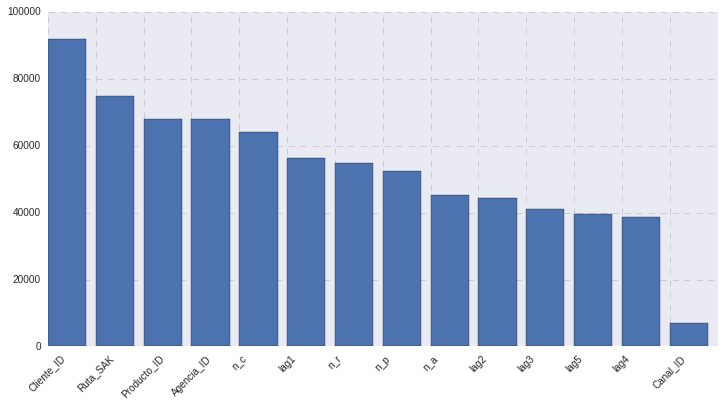

In [20]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'grid.color': '.8','grid.linestyle': u'--'}) 
%matplotlib inline

figsize(12, 6)
plt.bar(w['id'], w['count'], tick_label=w['name'])

plt.xticks(rotation=45)


In [16]:
# Save predictions to an SArray
# predictions = model.predict(train)

# Evaluate the model and save the results into a dictionary

# results = model.evaluate(train)
# print results


{'max_error': 5.325312852859497, 'rmse': 0.42764513831793416}


## predict

In [10]:
test = gl.SFrame.read_csv(path + 'test_fs_w8.csv', verbose=False)
# test = test.join(town, on=['Agencia_ID','Producto_ID'], how='left')
# del test['Town']
# test = test.fillna('t_c',1)
# test = test.fillna('tcc',0)
# test = test.fillna('tp_sum',0)

In [11]:

del test['Canal_ID']
del test['lag_sum']
del test['n_t']
del test['prom']
del test['brand']
del test['healthy']
del test['drink']

In [12]:
print test.column_names()
print len(test.column_names())

['id', 'Semana', 'Agencia_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'prior_sum', 'week_times', 'n_a', 'n_r', 'n_c', 'n_p', 'Town', 't_c', 'tcc', 'tp_sum', 're_sum', 'p_clt', 'weight', 'pieces', 'w_per_piece', 'price', 'c_clt']
28


In [13]:
'''Add feature to week 11'''
def feature_w11(test, lag_sum=0, prior_sum=0):
    test_full = test.copy()
    ids = test['id']
    del test['id']
    del test['Semana']
    demand_log = model.predict(test)
    sub1 = gl.SFrame({'id':ids,'Demanda_uni_equil':demand_log})
    test_full = test_full.join(sub1,on=['id'],how='left')
    lag11 = test_full.groupby(key_columns=['Semana','Cliente_ID','Producto_ID'], operations={'lag11':agg.MEAN('Demanda_uni_equil')})
    lag11['Semana'] = lag11['Semana'].apply(lambda x: x+1)
    test_full = test_full.join(lag11,on=['Semana','Cliente_ID','Producto_ID'],how='left')
    test_full = test_full.fillna('lag11',0)
    test_full['lag1'] = test_full['lag1'] + test_full['lag11']
    
    if lag_sum == 1:
        test_full['lag_sum'] = test_full['lag_sum'] + test_full['lag11']
        
    if prior_sum == 1:
        lag_sum11 = test_full.groupby(key_columns=['Semana','Cliente_ID','Producto_ID'], operations={'lag_sum11':agg.SUM('Demanda_uni_equil')})
        lag_sum11['Semana'] = lag_sum11['Semana'].apply(lambda x: x+1)
        test_full = test_full.join(lag_sum11,on=['Semana','Cliente_ID','Producto_ID'],how='left')
        test_full = test_full.fillna('lag_sum11',0)
        test_full['prior_sum'] = test_full['prior_sum'] + test_full['lag_sum11']
        del test_full['lag_sum11']

    del test_full['lag11']
    del test_full['Demanda_uni_equil']
    return test_full

In [14]:
test_full = feature_w11(test, lag_sum=0, prior_sum=1)

ids = test_full['id']
del test_full['id']
del test_full['Semana']
demand_log = model.predict(test_full)
sub = gl.SFrame({'id':ids,'Demanda_uni_equil':demand_log})

In [15]:
import math
sub['Demanda_uni_equil'] = sub['Demanda_uni_equil'].apply(lambda x: math.expm1(max(0, x)))

In [16]:
file_name = 'w8'+'_f'+str(model.num_features)+'_n'+str(model.max_iterations)+'_c'+str(model.column_subsample)
sub.save('/home/zongyi/Dropbox/kaggle/' + file_name,format='csv')

In [56]:
sub

Demanda_uni_equil,id
3.44166957171,4721633
1.85704603627,6035419
1.66017810641,3462602
2.07406741465,855102
9.65243960287,3242700
12.1227423306,2421613
3.56680995819,1573296
6.66333331862,1619375
1.67583492502,3539201
8.6226952164,1631781
